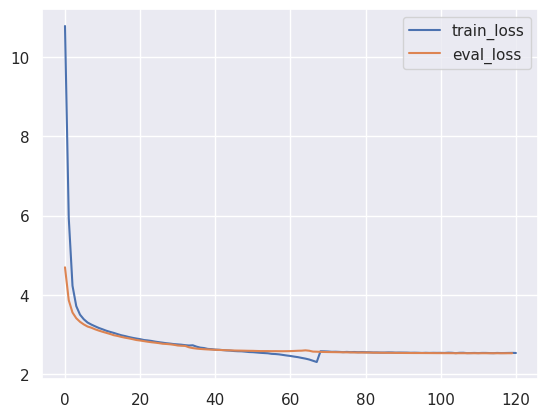

In [2]:
# 读取log_2024_07-08到log_2024_07-10的日志文件，按顺序将所有train_loss和eval_loss存入一个list，并可视化出来
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def get_loss(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    train_loss = []
    eval_loss = []
    for line in lines:
        if "'loss'" in line:
            train_loss.append(float(re.findall(r"'loss': (.*?),", line)[0]))
        if "'eval_loss'" in line:
            eval_loss.append(float(re.findall(r"'eval_loss': (.*?),", line)[0]))
    return train_loss, eval_loss

def get_date_num(i):
    if len(i) < 2:
        return '0' + i
    return i

def main():
    train_loss = []
    eval_loss = []
    for i in range(1, 3):
        file_path = 'opt_llama-log_2024-08-' + get_date_num(str(i))
        train_loss_, eval_loss_ = get_loss(file_path)
        train_loss += train_loss_
        eval_loss += eval_loss_
    plt.plot(train_loss, label='train_loss')
    plt.plot(eval_loss, label='eval_loss')
    plt.legend()
    plt.show()
    
if __name__ == '__main__':
    main()